In [1]:
import pandas as pd 
df = pd.read_csv('Norm-PHO-Binary.csv')

In [2]:
df.head()

,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression
0,Female,4.00,3.0,2.0,1.0,0.00,2.00,2.0,1.0,NO
1,Female,8.00,0.0,2.0,0.0,1.00,0.00,0.0,4.0,NO
2,Male,1.67,0.0,0.0,0.0,6.17,0.67,0.0,6.5,NO
3,Male,7.00,0.0,3.0,0.0,0.00,5.00,0.0,0.0,NO
4,Male,3.00,2.0,1.0,0.0,2.00,1.00,0.0,6.0,YES


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            291 non-null    object 
 1   Emotion_Joy       291 non-null    float64
 2   Emotion_Sadness   291 non-null    float64
 3   Emotion_Anger     291 non-null    float64
 4   Emotion_Disgust   291 non-null    float64
 5   Emotion_Fear      291 non-null    float64
 6   Emotion_Surprise  291 non-null    float64
 7   Emotion_Contempt  291 non-null    float64
 8   Emotion_Neutral   291 non-null    float64
 9   Depression        291 non-null    object 
dtypes: float64(8), object(2)
memory usage: 22.9+ KB


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Depression'] = le.fit_transform(df['Depression'])

In [5]:
df = pd.get_dummies(df, prefix = ['Gender'], columns = ['Gender'])
df.head()

,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression,Gender_Female,Gender_Male
0,4.00,3.0,2.0,1.0,0.00,2.00,2.0,1.0,0,1,0
1,8.00,0.0,2.0,0.0,1.00,0.00,0.0,4.0,0,1,0
2,1.67,0.0,0.0,0.0,6.17,0.67,0.0,6.5,0,0,1
3,7.00,0.0,3.0,0.0,0.00,5.00,0.0,0.0,0,0,1
4,3.00,2.0,1.0,0.0,2.00,1.00,0.0,6.0,1,0,1


In [6]:
df['Depression'].value_counts()

0    155
1    136
Name: Depression, dtype: int64

In [7]:
target = df['Depression']

In [8]:
features = df.drop('Depression', axis = 1)

In [24]:
from sklearn.dummy import DummyClassifier
uniform_cls = DummyClassifier(strategy = 'uniform').fit(features, target)
from sklearn.model_selection import cross_val_score
validation_f1 = cross_val_score(uniform_cls, features, target, scoring = 'f1', cv =10).mean()
validation_precision = cross_val_score(uniform_cls, features, target, scoring = 'precision', cv =10).mean()
validation_recall = cross_val_score(uniform_cls, features, target, scoring = 'recall', cv =10).mean()
validation_accuracy = cross_val_score(uniform_cls, features, target, scoring = 'accuracy', cv =10).mean()
print("Accuracy (Validation) = ", validation_accuracy)
print("f1 (Validation) = ", validation_f1)
print("precision (Validation) = ", validation_precision)
print("recall (Validation) = ", validation_recall)

Accuracy (Validation) =  0.4744827586206896
f1 (Validation) =  0.4252141732119485
precision (Validation) =  0.45443510737628384
recall (Validation) =  0.4928571428571429


In [11]:
#determine the best crossfold 
from sklearn.neighbors import KNeighborsClassifier
C = []
validation_score = []
for c in range (2,31):
    knn = KNeighborsClassifier(n_neighbors = 1)
    validation = cross_val_score(knn, features, target, scoring = 'accuracy', cv = c).mean()
    validation_score.append(validation)
    C.append(c)
C_score = dict(zip(C, validation_score))
for keys, values in C_score.items():
    print(keys, ":", values)

2 : 0.5430798299480397
3 : 0.5257731958762887
4 : 0.5052796803652968
5 : 0.518936294564582
6 : 0.5261479591836734
7 : 0.5465405674464908
8 : 0.5292792792792793
9 : 0.5293560606060606
10 : 0.5289655172413793
11 : 0.5365190365190364
12 : 0.5397222222222222
13 : 0.5161143204621464
14 : 0.5535714285714286
15 : 0.5398245614035087
16 : 0.5460526315789473
17 : 0.5426758938869665
18 : 0.5494281045751634
19 : 0.5291666666666666
20 : 0.5302380952380952
21 : 0.5434327577184719
22 : 0.535964035964036
23 : 0.5437569676700111
24 : 0.5427350427350427
25 : 0.54
26 : 0.5425407925407926
27 : 0.5434343434343435
28 : 0.5399350649350649
29 : 0.5498432601880878
30 : 0.55


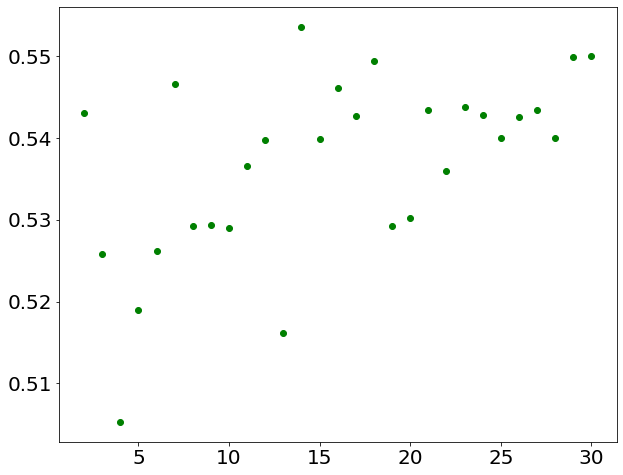

In [13]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size' : 20, 'figure.figsize': (10, 8)})
plt.scatter(C, validation_score, color ='g')

The best cv is 14 in KNN

In [14]:
#KNN, cv = 14
from sklearn.neighbors import KNeighborsClassifier
K = []
Validation = []
for k in range (1,31):
    knn = KNeighborsClassifier(n_neighbors = k)
    validation = cross_val_score(knn, features, target, scoring = 'accuracy', cv =14).mean()
    Validation.append(validation)
    K.append(k)
knn_score = dict(zip(K, Validation))
for keys, values in knn_score.items():
    print(keys, ":", values)

1 : 0.5535714285714286
2 : 0.5362244897959183
3 : 0.5290816326530613
4 : 0.5562925170068028
5 : 0.5525510204081633
6 : 0.5596938775510204
7 : 0.555952380952381
8 : 0.5496598639455782
9 : 0.5489795918367346
10 : 0.5491496598639456
11 : 0.5523809523809524
12 : 0.573469387755102
13 : 0.5938775510204082
14 : 0.5767006802721087
15 : 0.586904761904762
16 : 0.5763605442176871
17 : 0.5899659863945578
18 : 0.5693877551020409
19 : 0.5899659863945578
20 : 0.5763605442176871
21 : 0.5863945578231292
22 : 0.5795918367346938
23 : 0.5899659863945578
24 : 0.5933673469387755
25 : 0.6001700680272108
26 : 0.566156462585034
27 : 0.5663265306122449
28 : 0.5870748299319727
29 : 0.6003401360544218
30 : 0.5833333333333334


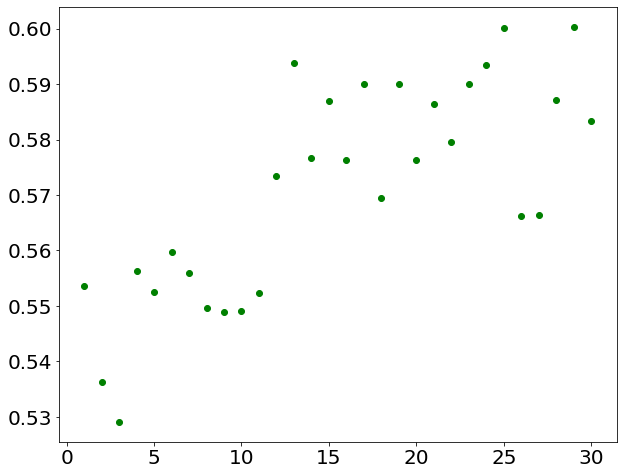

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size' : 20, 'figure.figsize': (10, 8)})
plt.scatter(K, Validation, color ='g')

the best K value is 29 in KNN

In [16]:
knn = KNeighborsClassifier(n_neighbors = 29)
validation_f1 = cross_val_score(knn, features, target, scoring = 'f1', cv =14).mean()
validation_precision = cross_val_score(knn, features, target, scoring = 'precision', cv =14).mean()
validation_recall = cross_val_score(knn, features, target, scoring = 'recall', cv =14).mean()
validation_accuracy = cross_val_score(knn, features, target, scoring = 'accuracy', cv =14).mean()
print("Accuracy (Validation) = ", validation_accuracy)
print("f1 (Validation) = ", validation_f1)
print("precision (Validation) = ", validation_precision)
print("recall (Validation) = ", validation_recall)

Accuracy (Validation) =  0.6003401360544218
f1 (Validation) =  0.5851864132380641
precision (Validation) =  0.5687788402074117
recall (Validation) =  0.61984126984127


In [18]:
from sklearn.naive_bayes import BernoulliNB
C = []
validation_score = []
for c in range (2,30):
    bnb = BernoulliNB(binarize = 0.0)
    validation = cross_val_score(bnb, features, target, cv = c, scoring ='accuracy').mean()
    validation_score.append(validation)
    C.append(c)
C_score = dict(zip(C, validation_score))
for keys, values in C_score.items():
    print(keys, ":", values)

2 : 0.5601558809636278
3 : 0.5945017182130584
4 : 0.5532724505327244
5 : 0.5669199298655757
6 : 0.5737670068027211
7 : 0.5842044134727062
8 : 0.5672860360360361
9 : 0.5596590909090909
10 : 0.5670114942528736
11 : 0.5603470603470604
12 : 0.5741666666666667
13 : 0.5779872301611433
14 : 0.5802721088435374
15 : 0.5638596491228072
16 : 0.5635964912280702
17 : 0.5840061514802001
18 : 0.573733660130719
19 : 0.5736842105263158
20 : 0.5666666666666667
21 : 0.576661433804291
22 : 0.5741758241758241
23 : 0.5632664437012262
24 : 0.5707799145299145
25 : 0.5836363636363636
26 : 0.5664335664335665
27 : 0.5592592592592592
28 : 0.5646103896103897
29 : 0.5633228840125392


The best cv is 2 in Naive Bayes

In [19]:
bnb.fit(features, target)
validation_f1 = cross_val_score(bnb, features, target, scoring = 'f1', cv =2).mean()
validation_precision = cross_val_score(bnb, features, target, scoring = 'precision', cv =2).mean()
validation_recall = cross_val_score(bnb, features, target, scoring = 'recall', cv =2).mean()
validation_accuracy = cross_val_score(bnb, features, target, scoring = 'accuracy', cv =2).mean()
print("Accuracy (Validation) = ", validation_accuracy)
print("f1 (Validation) = ", validation_f1)
print("precision (Validation) = ", validation_precision)
print("recall (Validation) = ", validation_recall)

Accuracy (Validation) =  0.5601558809636278
f1 (Validation) =  0.536158452326117
precision (Validation) =  0.5330859616573902
recall (Validation) =  0.5735294117647058


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
C = []
validation_score = []
for c in range (2,30):
    gnb = GaussianNB()
    validation = cross_val_score(gnb, features, target, cv = c, scoring ='accuracy').mean()
    validation_score.append(validation)
    C.append(c)
C_score = dict(zip(C, validation_score))
for keys, values in C_score.items():
    print(keys, ":", values)

2 : 0.5326641473783655
3 : 0.5601374570446735
4 : 0.5669710806697108
5 : 0.5637054354178843
6 : 0.5469104308390024
7 : 0.5606437697030032
8 : 0.5707582582582582
9 : 0.5501893939393939
10 : 0.5602298850574712
11 : 0.5577570577570578
12 : 0.5608333333333334
13 : 0.5574642748555791
14 : 0.5768707482993197
15 : 0.5814035087719298
16 : 0.5740131578947368
17 : 0.5667051134179162
18 : 0.5637254901960784
19 : 0.5708333333333333
20 : 0.5747619047619048
21 : 0.5669806384092099
22 : 0.5681818181818181
23 : 0.5772017837235228
24 : 0.577724358974359
25 : 0.5839393939393939
26 : 0.5536130536130537
27 : 0.5626262626262627
28 : 0.5655844155844155
29 : 0.5636363636363637


the best Cv is 25 in Gaussian Naive bayes

In [12]:
gnb.fit(features, target)
validation_f1 = cross_val_score(gnb, features, target, scoring = 'f1', cv =25).mean()
validation_precision = cross_val_score(gnb, features, target, scoring = 'precision', cv =25).mean()
validation_recall = cross_val_score(gnb, features, target, scoring = 'recall', cv =25).mean()
validation_accuracy = cross_val_score(gnb, features, target, scoring = 'accuracy', cv =25).mean()
print("Accuracy (Validation) = ", validation_accuracy)
print("f1 (Validation) = ", validation_f1)
print("precision (Validation) = ", validation_precision)
print("recall (Validation) = ", validation_recall)

Accuracy (Validation) =  0.5839393939393939
f1 (Validation) =  0.5302513042513042
precision (Validation) =  0.564952380952381
recall (Validation) =  0.524


In [21]:
from sklearn.svm import SVC
C = []
validation_score = []
for c in range (2,31):
    svmlinear = SVC(kernel = 'linear', C = 1)
    validation = cross_val_score(svmlinear, features, target, cv = c, scoring ='accuracy').mean()
    validation_score.append(validation)
    C.append(c)
C_score = dict(zip(C, validation_score))
for keys, values in C_score.items():
    print(keys, ":", values)

2 : 0.567005196032121
3 : 0.5807560137457044
4 : 0.5635464231354643
5 : 0.5636469900642899
6 : 0.5639172335600907
7 : 0.5637132901941265
8 : 0.5810810810810811
9 : 0.5501893939393939
10 : 0.5844827586206895
11 : 0.5675990675990676
12 : 0.5609722222222222
13 : 0.5744907266646397
14 : 0.5561224489795918
15 : 0.5710526315789473
16 : 0.5710891812865497
17 : 0.5607458669742407
18 : 0.5745506535947712
19 : 0.5782894736842105
20 : 0.5819047619047619
21 : 0.5559916274201988
22 : 0.5821678321678322
23 : 0.5772017837235229
24 : 0.5649038461538461
25 : 0.566969696969697
26 : 0.5789627039627039
27 : 0.5680134680134681
28 : 0.5720779220779221
29 : 0.5567398119122258
30 : 0.5592592592592592


the best crossfold is 10

In [22]:
from sklearn.svm import SVC
# Import GridSearch from the sklearn library
from sklearn.model_selection import GridSearchCV
# The param_grid specifies one grid should be explored
param_grid = {'C': [1, 10, 100, 1000]}
# Fit on the dataset on all parameter combinations in param_grid
# Retain the best combination
grid_search = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv = 10)
grid_result = grid_search.fit(features, target)
grid_result
grid_result.best_params_

{'C': 1}

In [24]:
svmlinear = SVC(kernel = 'linear', C = 1)
svmlinear.fit(features, target)
validation_f1 = cross_val_score(svmlinear, features, target, scoring = 'f1', cv =10).mean()
validation_precision = cross_val_score(svmlinear, features, target, scoring = 'precision', cv =10).mean()
validation_recall = cross_val_score(svmlinear, features, target, scoring = 'recall', cv =10).mean()
validation_accuracy = cross_val_score(svmlinear, features, target, scoring = 'accuracy', cv =10).mean()
print("Accuracy (Validation) = ", validation_accuracy)
print("f1 (Validation) = ", validation_f1)
print("precision (Validation) = ", validation_precision)
print("recall (Validation) = ", validation_recall)

Accuracy (Validation) =  0.5844827586206895
f1 (Validation) =  0.5180268459398893
precision (Validation) =  0.5688598819481172
recall (Validation) =  0.4950549450549451


In [15]:
from sklearn.svm import SVC
C = []
validation_score = []
for c in range (2,31):
    svmpoly = SVC(kernel = 'poly', C = 10)
    validation = cross_val_score(svmpoly, features, target, cv = c, scoring ='accuracy').mean()
    validation_score.append(validation)
    C.append(c)
C_score = dict(zip(C, validation_score))
for keys, values in C_score.items():
    print(keys, ":", values)

2 : 0.5774208786017949
3 : 0.5704467353951891
4 : 0.5807648401826484
5 : 0.584395090590298
6 : 0.5911989795918368
7 : 0.5878546540567446
8 : 0.5914977477477477
9 : 0.5782828282828283
10 : 0.5811494252873562
11 : 0.5811965811965812
12 : 0.5850000000000001
13 : 0.60261477652782
14 : 0.6181972789115646
15 : 0.6096491228070176
16 : 0.6123903508771931
17 : 0.5915032679738562
18 : 0.616421568627451
19 : 0.5958333333333333
20 : 0.5897619047619047
21 : 0.6153846153846152
22 : 0.6156343656343655
23 : 0.6120401337792643
24 : 0.6225961538461539
25 : 0.6154545454545454
26 : 0.6022727272727273
27 : 0.6131313131313131
28 : 0.6172077922077923
29 : 0.6188087774294672
30 : 0.6225925925925927


The best cv in SVM Poly is 30

In [16]:
# Import GridSearch from the sklearn library
from sklearn.model_selection import GridSearchCV
# The param_grid specifies one grid should be explored
param_grid = {'C': [1, 10, 100, 1000]}
# Fit on the dataset on all parameter combinations in param_grid
# Retain the best combination
grid_search = GridSearchCV(SVC(kernel = 'poly'), param_grid, cv = 30)
grid_result = grid_search.fit(features, target)
grid_result
grid_result.best_params_

{'C': 10}

In [17]:
svmpoly = SVC(kernel = 'poly', C = 10)
svmpoly.fit(features, target)
validation_f1 = cross_val_score(svmpoly, features, target, scoring = 'f1', cv =30).mean()
validation_precision = cross_val_score(svmpoly, features, target, scoring = 'precision', cv =30).mean()
validation_recall = cross_val_score(svmpoly, features, target, scoring = 'recall', cv =30).mean()
validation_accuracy = cross_val_score(svmpoly, features, target, scoring = 'accuracy', cv =30).mean()
print("Accuracy (Validation) = ", validation_accuracy)
print("f1 (Validation) = ", validation_f1)
print("precision (Validation) = ", validation_precision)
print("recall (Validation) = ", validation_recall)

Accuracy (Validation) =  0.6225925925925927
f1 (Validation) =  0.597081807081807
precision (Validation) =  0.5757539682539683
recall (Validation) =  0.6566666666666667


In [22]:
from sklearn.svm import SVC
C = []
validation_score = []
for c in range (2,31):
    svmrbf = SVC(kernel = 'rbf', C = 1)
    validation = cross_val_score(svmrbf, features, target, cv = c, scoring ='accuracy').mean()
    validation_score.append(validation)
    C.append(c)
C_score = dict(zip(C, validation_score))
for keys, values in C_score.items():
    print(keys, ":", values)

2 : 0.5979924421350968
3 : 0.6013745704467355
4 : 0.6149638508371384
5 : 0.5841613091759206
6 : 0.5911989795918368
7 : 0.5984735357557657
8 : 0.6151463963963963
9 : 0.5702861952861953
10 : 0.6012643678160919
11 : 0.6047656047656047
12 : 0.5947222222222223
13 : 0.6017026451809061
14 : 0.6074829931972789
15 : 0.5950877192982457
16 : 0.5910087719298245
17 : 0.5945790080738177
18 : 0.6149918300653595
19 : 0.6083333333333333
20 : 0.6054761904761905
21 : 0.6075353218210362
22 : 0.6113886113886114
23 : 0.5905797101449275
24 : 0.5948183760683762
25 : 0.6003030303030303
26 : 0.6019813519813519
27 : 0.5851851851851853
28 : 0.5922077922077922
29 : 0.5978056426332288
30 : 0.5892592592592591


The best cv is 8 in SVM RBF

In [23]:
# Import GridSearch from the sklearn library
from sklearn.model_selection import GridSearchCV
# The param_grid specifies one grid should be explored
param_grid = {'C': [1, 10, 100, 1000]}
# Fit on the dataset on all parameter combinations in param_grid
# Retain the best combination
grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = 8)
grid_result = grid_search.fit(features, target)
grid_result
grid_result.best_params_

{'C': 1}

In [24]:
svmrbf = SVC(kernel = 'rbf', C = 1)
svmrbf.fit(features, target)
validation_f1 = cross_val_score(svmrbf, features, target, scoring = 'f1', cv =8).mean()
validation_precision = cross_val_score(svmrbf, features, target, scoring = 'precision', cv =8).mean()
validation_recall = cross_val_score(svmrbf, features, target, scoring = 'recall', cv =8).mean()
validation_accuracy = cross_val_score(svmrbf, features, target, scoring = 'accuracy', cv =8).mean()
print("Accuracy (Validation) = ", validation_accuracy)
print("f1 (Validation) = ", validation_f1)
print("precision (Validation) = ", validation_precision)
print("recall (Validation) = ", validation_recall)

Accuracy (Validation) =  0.6151463963963963
f1 (Validation) =  0.5705147283272283
precision (Validation) =  0.6031897926634768
recall (Validation) =  0.5588235294117647


In [26]:
from sklearn.svm import SVC
C = []
validation_score = []
for c in range (2,31):
    svmsig = SVC(kernel = 'sigmoid', C = 1)
    validation = cross_val_score(svmsig, features, target, cv = c, scoring ='accuracy').mean()
    validation_score.append(validation)
    C.append(c)
C_score = dict(zip(C, validation_score))
for keys, values in C_score.items():
    print(keys, ":", values)

2 : 0.5705951818611242
3 : 0.5532646048109966
4 : 0.5667808219178082
5 : 0.5328462887200468
6 : 0.5320294784580498
7 : 0.5457939273270284
8 : 0.5253378378378378
9 : 0.5186237373737375
10 : 0.5224137931034483
11 : 0.5212380212380212
12 : 0.5190277777777778
13 : 0.5148981453329279
14 : 0.5181972789115646
15 : 0.5247368421052631
16 : 0.5124269005847952
17 : 0.5261437908496732
18 : 0.5302287581699345
19 : 0.5221491228070175
20 : 0.5309523809523811
21 : 0.5251177394034536
22 : 0.5164835164835165
23 : 0.5027870680044593
24 : 0.5026709401709403
25 : 0.513030303030303
26 : 0.5198135198135199
27 : 0.5077441077441077
28 : 0.5035714285714286
29 : 0.5090909090909091
30 : 0.5070370370370371


the best cv in SVM sigmoid is 7

In [26]:
# Import GridSearch from the sklearn library
from sklearn.model_selection import GridSearchCV
# The param_grid specifies one grid should be explored
param_grid = {'C': [1, 10, 100, 1000]}
# Fit on the dataset on all parameter combinations in param_grid
# Retain the best combination
grid_search = GridSearchCV(SVC(kernel = 'sigmoid'), param_grid, cv = 7)
grid_result = grid_search.fit(features, target)
grid_result
grid_result.best_params_

{'C': 1}

In [27]:
svmrbf = SVC(kernel = 'sigmoid', C = 1)
svmrbf.fit(features, target)
validation_f1 = cross_val_score(svmrbf, features, target, scoring = 'f1', cv =7).mean()
validation_precision = cross_val_score(svmrbf, features, target, scoring = 'precision', cv =7).mean()
validation_recall = cross_val_score(svmrbf, features, target, scoring = 'recall', cv =7).mean()
validation_accuracy = cross_val_score(svmrbf, features, target, scoring = 'accuracy', cv =7).mean()
print("Accuracy (Validation) = ", validation_accuracy)
print("f1 (Validation) = ", validation_f1)
print("precision (Validation) = ", validation_precision)
print("recall (Validation) = ", validation_recall)

Accuracy (Validation) =  0.5457939273270284
f1 (Validation) =  0.3820907673414193
precision (Validation) =  0.49659863945578225
recall (Validation) =  0.31992481203007517


In [18]:
# Import pickle
import pickle
# Specify the file name to save the model
# Use filename='freq_model.sav' for Freq-PHO-Binary
# Use filename='norm_model.sav' for Norm-PHO-Binary
filename='norm_model.sav'
# Open the file name in write mode. Pass the filename and model.
# Replace modelname with the name of your model
pickle.dump(svmpoly, open(filename, 'wb'))